<a href="https://colab.research.google.com/github/aliciawill/python-data/blob/master/%EC%A7%88%EB%B3%91%EC%98%88%EC%B8%A1_%EC%95%94%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/content/wisc_bc_data.csv', encoding='utf-8')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
df['diagnosis']

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [7]:
## 1. Unnamed삭제
## 2. Age~Thal : 설명변수
## 3. AHD : 종속변수

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']],
    df['diagnosis'],
    test_size=0.2,
    random_state=42

)

In [9]:
X_train.shape, X_test.shape

((455, 31), (114, 31))

In [10]:
y_train.shape, y_test.shape

((455,), (114,))

In [11]:
y_train[:10]

68     B
181    M
63     M
248    B
60     M
15     B
290    B
137    B
155    B
517    M
Name: diagnosis, dtype: object

In [12]:
## 단일 모델들에 대한 객체 생성
## voting(hard/soft)

In [13]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 3,
    max_features = 8,
    random_state = 100
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=8, random_state=100)

In [14]:
svc = SVC(
    kernel = 'rbf',
    C=0.1,
    gamma=10,
    probability=True,
    random_state = 10
)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=10, probability=True, random_state=10)

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
dt_predt = dt.predict(X_test)

In [19]:
svc_predt = svc.predict(X_test)

In [20]:
lr_predt = lr.predict(X_test)

In [21]:
dt_acc = accuracy_score(y_test, dt_predt)
svc_acc = accuracy_score(y_test, svc_predt)
lr_acc = accuracy_score(y_test, lr_predt)
dt_acc, svc_acc, lr_acc

(0.9385964912280702, 0.6491228070175439, 0.6491228070175439)

In [26]:
## 하드 보팅
voting_clf1 = VotingClassifier(
    estimators= [
        ('decision tree', dt), 
        ('svc', svc), 
        ('lr', lr)
    ],
    weights=[1, 1, 1],
    voting='hard'
)
voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.6491228070175439

In [27]:
## 소프트 보팅
voting_clf2 = VotingClassifier(
    estimators= [
        ('decision tree', dt), 
        ('svc', svc), 
        ('lr', lr)
    ],
    weights=[1, 1, 1],
    voting='soft'
)
voting_clf2.fit(X_train, y_train)
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9385964912280702

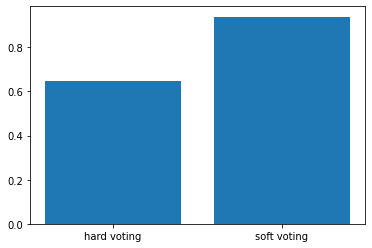

In [28]:
### 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(2)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)
            ])
plt.xticks(x, ['hard voting','soft voting']);

In [29]:
## 소프트보팅이 하드보팅보다 정확도가 높아서 많이 쓰임.

In [31]:
## bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [33]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.9649122807017544

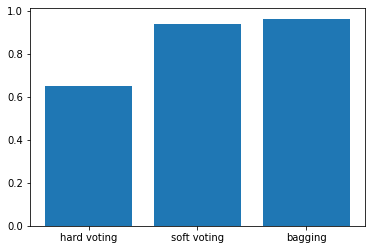

In [35]:
x = np.arange(3)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, rf_predt)
            ])
plt.xticks(x, ['hard voting','soft voting', 'bagging']);

In [36]:
confusion_matrix(y_test, soft_voting_predicted)

array([[72,  2],
       [ 5, 35]])

In [ ]:
## b:양성, m:악성
## 정상인 74명 중 2명을 암환자로 판단
## 암환자 40명 중 5명을 정상환자로 판단

In [ ]:
## 정상이 74명인데, 72명만 정상, 2명은 암환자
## 암환자가 40명인데, 35명만 암환자, 5명은 정상
## recall(재현율)이 bagging보다는 낮은 편.

In [37]:
confusion_matrix(y_test, rf_predt)

array([[71,  3],
       [ 1, 39]])

In [ ]:
## 정상이 74명인데, 71명만 정상, 3명은 암환자
## 암환자가 40명인데, 39명만 암환자, 1명은 정상
## recall(재현율)이 softvoting보다는 높은 편.
## softvoting model보다는 bagging모델을 선택하는 것이 좋음.

In [40]:
confusion_matrix(y_test, svc_predt)

array([[74,  0],
       [40,  0]])

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [45]:
gbc = GradientBoostingClassifier(
      random_state=42
).fit(X_train, y_train)

In [44]:
hist = HistGradientBoostingClassifier(
      random_state=42
).fit(X_train, y_train)

In [42]:
xgb = XGBClassifier(
    random_state=42,
    tree_method='hist'
).fit(X_train, y_train)

In [43]:
lgbm = LGBMClassifier(
    random_state=42
).fit(X_train, y_train)

In [46]:
gbc_predicted = gbc.predict(X_test)
accuracy_score(y_test, gbc_predicted)

0.9824561403508771

In [47]:
hist_predicted = hist.predict(X_test)
accuracy_score(y_test, hist_predicted)

0.9736842105263158

In [48]:
xgb_predicted = xgb.predict(X_test)
accuracy_score(y_test, xgb_predicted)

0.9912280701754386

In [49]:
lgbm_predicted = lgbm.predict(X_test)
accuracy_score(y_test, lgbm_predicted)

0.9824561403508771

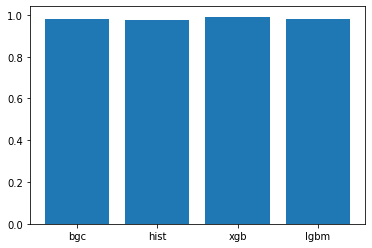

In [50]:
x = np.arange(4)
plt.bar(x, height= [
                    accuracy_score(y_test, gbc_predicted),
                    accuracy_score(y_test, hist_predicted),
                    accuracy_score(y_test, xgb_predicted),
                    accuracy_score(y_test, lgbm_predicted),
            ])
plt.xticks(x, ['bgc','hist', 'xgb', 'lgbm']);

In [51]:
confusion_matrix(y_test, xgb_predicted)

array([[74,  0],
       [ 1, 39]])

In [52]:
### xgboost는 암환자 40명 중 39명을 찾아냈고, 1명을 찾아내지 못함.
### 정확도,재현율이 높으므로, xgboost 모델 선정이 최선!!!